In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import sympy

In [2]:
l_1 = sympy.Symbol('l_1')
l_1

l_1

In [3]:
l_2 = sympy.Symbol('l_2')
l_2

l_2

In [4]:
q1 = sympy.Symbol('\\theta_1')
q1

\theta_1

In [5]:
q2 = sympy.Symbol('\\theta_2')
q2

\theta_2

In [6]:
def Rz(theta):
    Rz = sympy.Matrix([[sympy.cos(theta),-sympy.sin(theta),0],
                       [sympy.sin(theta),sympy.cos(theta),0],
                       [0,0,1]])
    return Rz

In [7]:
Rz(q1)

Matrix([
[cos(\theta_1), -sin(\theta_1), 0],
[sin(\theta_1),  cos(\theta_1), 0],
[            0,              0, 1]])

In [8]:
R_ab = Rz(q1)
R_bc = Rz(q2)

In [9]:
ax_in_a = sympy.Matrix([1,0,0])
ax_in_a

Matrix([
[1],
[0],
[0]])

In [10]:
bx_in_b = ax_in_a
cx_in_c = ax_in_a

In [11]:
v1_in_b = l_1*bx_in_b
v1_in_a = R_ab*v1_in_b
v1_in_a

Matrix([
[l_1*cos(\theta_1)],
[l_1*sin(\theta_1)],
[                0]])

In [12]:
v2_in_c = l_2*cx_in_c
v2_in_b = R_bc*v2_in_c
v2_in_a = R_ab*v2_in_b
v2_in_a

Matrix([
[-l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2)],
[ l_2*sin(\theta_1)*cos(\theta_2) + l_2*sin(\theta_2)*cos(\theta_1)],
[                                                                 0]])

In [13]:
o = 0*ax_in_a
o

Matrix([
[0],
[0],
[0]])

In [14]:
p1 = o+v1_in_a
p1

Matrix([
[l_1*cos(\theta_1)],
[l_1*sin(\theta_1)],
[                0]])

In [15]:
p2 = p1+v2_in_a
p2

Matrix([
[l_1*cos(\theta_1) - l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2)],
[l_1*sin(\theta_1) + l_2*sin(\theta_1)*cos(\theta_2) + l_2*sin(\theta_2)*cos(\theta_1)],
[                                                                                    0]])

In [16]:
points = [o.T, p1.T,p2.T]
points = sympy.Matrix(points)
design = {}
design[l_1] = 1
design[l_2] = 1
state = {}
state[q1] = 30*math.pi/180
state[q2] = 45*math.pi/180
points = points.subs(design)
points = points.subs(state)
points


Matrix([
[                0,                0, 0],
[0.866025403784439,              0.5, 0],
[ 1.12484444888696, 1.46592582628907, 0]])

In [17]:
points = numpy.array(points,dtype=float)
points = points.squeeze()
points

array([[0.        , 0.        , 0.        ],
       [0.8660254 , 0.5       , 0.        ],
       [1.12484445, 1.46592583, 0.        ]])

(np.float64(-0.05624222244434798),
 np.float64(1.1810866713313075),
 np.float64(-0.07329629131445341),
 np.float64(1.5392221176035217))

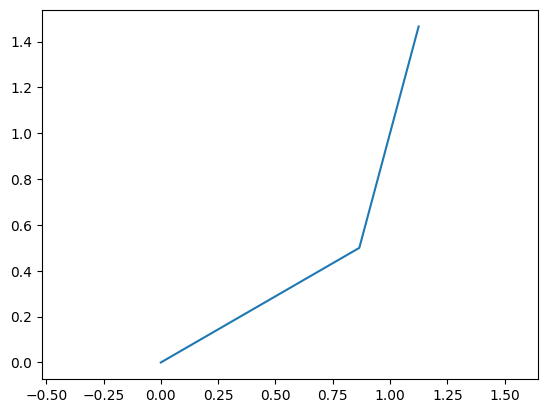

In [18]:
plt.plot(points[:,0],points[:,1])
plt.axis('equal')

In [19]:
J = p2.jacobian(sympy.Matrix([q1,q2]))

In [20]:
J

Matrix([
[-l_1*sin(\theta_1) - l_2*sin(\theta_1)*cos(\theta_2) - l_2*sin(\theta_2)*cos(\theta_1), -l_2*sin(\theta_1)*cos(\theta_2) - l_2*sin(\theta_2)*cos(\theta_1)],
[ l_1*cos(\theta_1) - l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2), -l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2)],
[                                                                                     0,                                                                  0]])

In [21]:
Jn = J.subs(design).subs(state)
Jn

Matrix([
[-1.46592582628907, -0.965925826289068],
[ 1.12484444888696,  0.258819045102521],
[                0,                  0]])